In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime
from datetime import date

vcs fazem ideia de como é nossa comunicação?

# Funções

In [2]:
def conta_palavras(linha):
    return len(linha.split())

In [3]:
def pega_data(linha):
    data = list(linha[:8])
    data.insert(6, '20')
    data = ''.join(data)
    hora = linha[10:15]
    data = data + ' ' + hora
    
    if valid_date(data) == True:
        return datetime.strptime(data, '%d/%m/%Y %H:%M')
    else:
        return None

In [4]:
def valid_date(datestring):
    try:
        datetime.strptime(datestring, '%d/%m/%Y %H:%M')
        return True
    except:
        return False

In [5]:
def pega_nome(linha):
    nome = ''
    for i in linha[18:]:
        if i == ':':
            return nome
        nome += i

In [6]:
def pega_texto(linha):
    linha2 = linha[18:]
    if ':' in linha2:
        return linha2[linha2.index(':') + 1:]
    else:
        return None

In [7]:
def cria_dic(linha):
    dic = {}
    dic['data'] = pega_data(linha)
    dic['nome'] = pega_nome(linha)
    dic['texto']= pega_texto(linha)
    
    return dic
    

In [8]:
def cria_lista_dics(arquivo):
    lista = []
    for linha in arquivo.readlines():
        lista.append(cria_dic(linha))
        
    return lista

# Organizando e limpando os dados

In [9]:
arquivo_conectivo = open('Conversa do WhatsApp com Conectivo.txt', 'r')

In [10]:
arquivo_cognitivo = open('Conversa do WhatsApp com Cognitivo.ai.txt', 'r')

In [11]:
lista_dics_conectivo = cria_lista_dics(arquivo_conectivo)

In [12]:
lis_dics_cognitivo = cria_lista_dics(arquivo_cognitivo)

In [13]:
lista = lis_dics_cognitivo + lista_dics_conectivo

In [14]:
lista[0]

{'data': datetime.datetime(2016, 11, 21, 14, 25), 'nome': None, 'texto': None}

In [15]:
lista[-1]

{'data': datetime.datetime(2017, 7, 27, 10, 12),
 'nome': 'Paula Arantes',
 'texto': ' Bom dia! A caminho tamb\xc3\xa9m\n'}

In [16]:
df = pd.DataFrame(lista)

In [17]:
df2 = df.dropna()

In [18]:
df2.nome.unique()

array(['\xe2\x80\xaa+55 21 99445-8762\xe2\x80\xac', 'Evandro', 'Camile',
       'Cloves Adriano', '\xe2\x80\xaa+55 21 99800-0857\xe2\x80\xac',
       'Raul Magno', '\xe2\x80\xaa+55 21 99835-6904\xe2\x80\xac',
       'Andre Nunes', 'Vinicius Cognitivo. ai', 'Dornelas',
       '\xe2\x80\xaa+55 21 99249-2640\xe2\x80\xac', 'Robson',
       'Paula Arantes'], dtype=object)

In [19]:
df2 = df2[-df2["nome"].isin(["\xe2\x80\xaa+55 21 99445-8762\xe2\x80\xac",
                             "\xe2\x80\xaa+55 21 99800-0857\xe2\x80\xac",
                            "\xe2\x80\xaa+55 21 99835-6904\xe2\x80\xac",
                            "\xe2\x80\xaa+55 21 99249-2640\xe2\x80\xac",
                            "Dornelas"])]

In [20]:
len(df2['data'])

4948

In [21]:
df3 = df2[df2['data'] >= date(2017,4,1)]

In [22]:
len(df3['data'])

3083

In [23]:
df3['numero_palavras'] = [conta_palavras(texto) for texto in df3['texto']]

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
def palavra_no_texto(palavra, texto):
    '''
    Esta função verifica se a 'palavra' 
    existe no texto:
    return --> False se não e True se sim
    '''
    palavra = palavra.lower()
    texto = texto.lower()
    match = re.search(palavra, texto)

    if match:
        return True

    return False


In [25]:
df3['risada'] = [palavra_no_texto('kk', texto) or 
                 palavra_no_texto('haha', texto) or
                 palavra_no_texto('rs', texto) for texto in df3['texto']]

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [26]:
df_risadas = df3[df3['risada'] == True]

In [27]:
def tamanho_da_risada(texto):
    texto = texto.lower()
    if texto.count('k'):
        return texto.count('k')
    if texto.count('ha'):
        return texto.count('ha')
    if texto.count('rs'):
        return texto.count('rs')
    else:
        None

In [28]:
df_risadas['tamanho_risada'] = [tamanho_da_risada(texto) for texto in df_risadas['texto']]

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
df3['Midia'] = [palavra_no_texto('<Mídia omitida>\n', texto) for texto in df3['texto']]

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
midia = df3[df3['Midia'] == True]

In [31]:
df3['ruim'] =  [palavra_no_texto(' ruim ', texto) or 
                palavra_no_texto(' mal ', texto) or
                palavra_no_texto(' bad ', texto) or
                palavra_no_texto('triste', texto) or
                palavra_no_texto('infeliz', texto) or
                palavra_no_texto('chato', texto)
                for texto in df3['texto']]

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
ruim = df3[df3['ruim'] == True]

In [33]:
ruim2 = df3[(df3['ruim'] == True) & (df3['risada'] == False)]

In [34]:
df3['negatividade'] = [palavra_no_texto('não', texto) for texto in df3['texto']]

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
negatividade = df3[df3['negatividade'] == True]

In [36]:
df3['sim'] = [palavra_no_texto('sim', texto) for texto in df3['texto']]

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
sim = df3[df3['sim'] == True]

In [38]:
df3['positividade'] = [palavra_no_texto('boa', texto) or
                      palavra_no_texto('legal', texto) or
                      palavra_no_texto(' feliz ', texto) or
                      palavra_no_texto('alegre', texto) or
                      palavra_no_texto('contente', texto) or
                      palavra_no_texto('alegria', texto) or
                      palavra_no_texto('felicidade', texto) for texto in df3['texto']]

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [39]:
positividade = df3[df3['positividade'] == True]

In [40]:
df2['viajante'] = [palavra_no_texto('viagem', texto) or
                  palavra_no_texto('viajando', texto) or
                  palavra_no_texto('viajar', texto) or
                  palavra_no_texto('viajarei', texto) or
                  palavra_no_texto('pro rio', texto) or
                  palavra_no_texto('para o rio', texto) or
                  palavra_no_texto('pra portugal', texto) or
                  palavra_no_texto('para portugal', texto) or
                  palavra_no_texto('vôo', texto) or
                  palavra_no_texto('avião', texto) or 
                  palavra_no_texto('aeroporto', texto) for texto in df2['texto']]

In [41]:
viajante = df2[df2['viajante'] == True]

In [42]:
df2['doente'] = [palavra_no_texto('doente', texto) or
                palavra_no_texto('hospital', texto) or
                palavra_no_texto('passei mal', texto) or
                palavra_no_texto('passando mal', texto) or
                palavra_no_texto('passar mal', texto) or
                palavra_no_texto('to mal', texto) or
                palavra_no_texto('remédio', texto) or
                palavra_no_texto('médico', texto) or
                palavra_no_texto('exame', texto) or
                palavra_no_texto('febre', texto) or
                palavra_no_texto(' dor ', texto) or 
                palavra_no_texto('vacina', texto) for texto in df2['texto']]

In [43]:
doente = df2[df2['doente'] == True]

In [44]:
df2.nome.unique()

array(['Evandro', 'Camile', 'Cloves Adriano', 'Raul Magno', 'Andre Nunes',
       'Vinicius Cognitivo. ai', 'Robson', 'Paula Arantes'], dtype=object)

In [45]:
def quem_menciona_quem(texto):
    texto = texto.lower()
    if ' evandro' in texto:
        return 'Evandro'
    elif ' evandrinho' in texto:
        return "Evandro"
    elif ' camile' in texto:
        return 'Camile'
    elif ' camis ' in texto:
        return 'Camile'
    elif ' cloves' in texto:
        return 'Cloves'
    elif ' clovinhos' in texto:
        return 'Cloves'
    elif ' raul' in texto:
        return 'Raul'
    elif ' andre' in texto:
        return 'Andre'
    elif ' dedé' in texto:
        return 'Andre'
    elif ' vinicius' in texto:
        return 'Vinicius'
    elif ' vini ' in texto:
        return 'Vinicius'
    elif ' jimmy' in texto:
        return 'Vinicius'
    elif ' vinicinho' in texto:
        return 'Vinicius'
    elif ' robson' in texto:
        return 'Robson'
    elif ' robsão' in texto:
        return 'Robson'
    elif ' paula' in texto:
        return 'Paula'
    elif ' paulinha' in texto:
        return 'Paula'
    else:
        return None

In [46]:
menciona = df3

In [47]:
menciona['menciona'] = [quem_menciona_quem(texto) for texto in df3['texto']] 

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [48]:
menciona = menciona.dropna()

In [49]:
menciona['nome2'] = [nome.split()[0] for nome in menciona['nome']]

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [50]:
menciona2 = pd.concat([menciona['nome2'], menciona['menciona']], axis=1, keys=['nome', 'menciona'])

In [51]:
menciona2.to_csv("menciona.csv", sep=';')

In [52]:
df2['on'] = [palavra_no_texto(' on ', texto) for texto in df2['texto']]

In [53]:
on = df2[df2['on'] == True]

In [54]:
on['hora do dia'] = on.data.dt.hour

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# Gráficos

01/04/2017 a 27/07/2017 

3083 mensagens retiradas do grupo Cognitivo.ai e Conectivo

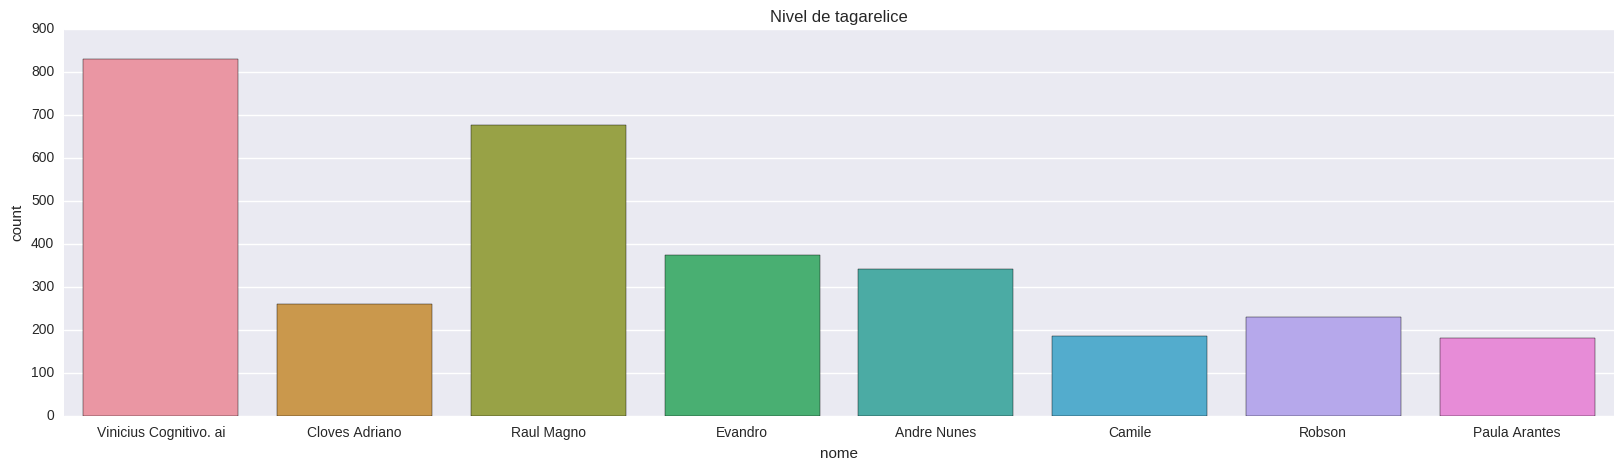

In [55]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 5)
sns.countplot(x='nome', data=df3).set_title('Nivel de tagarelice');

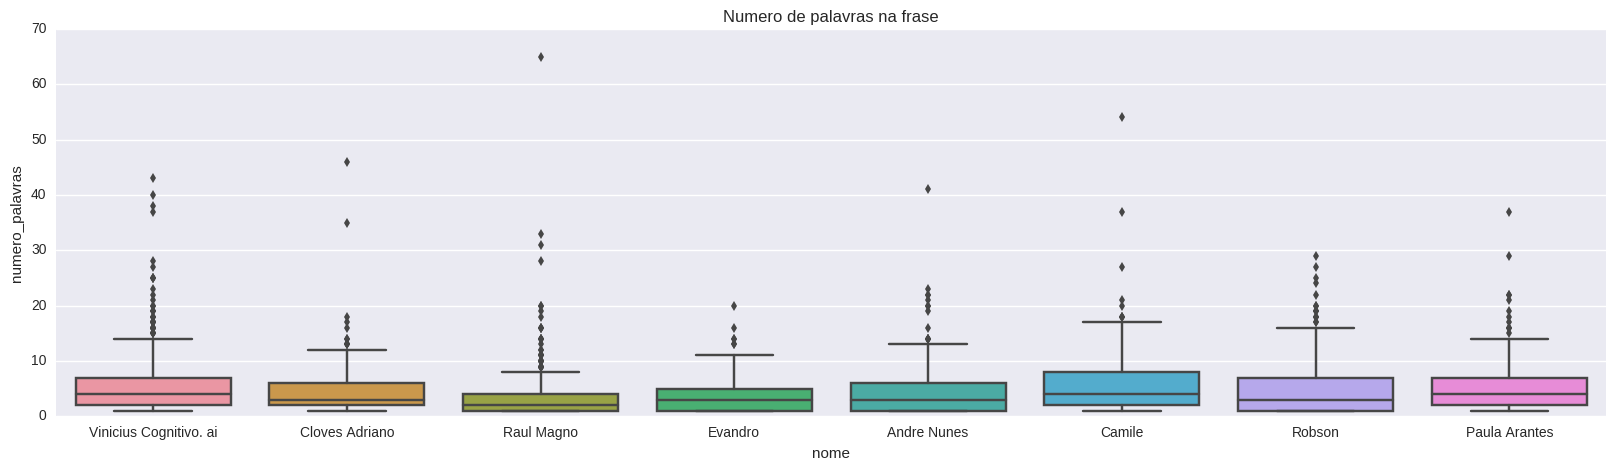

In [56]:
sns.boxplot(x='nome', y='numero_palavras', data=df3).set_title('Numero de palavras na frase');

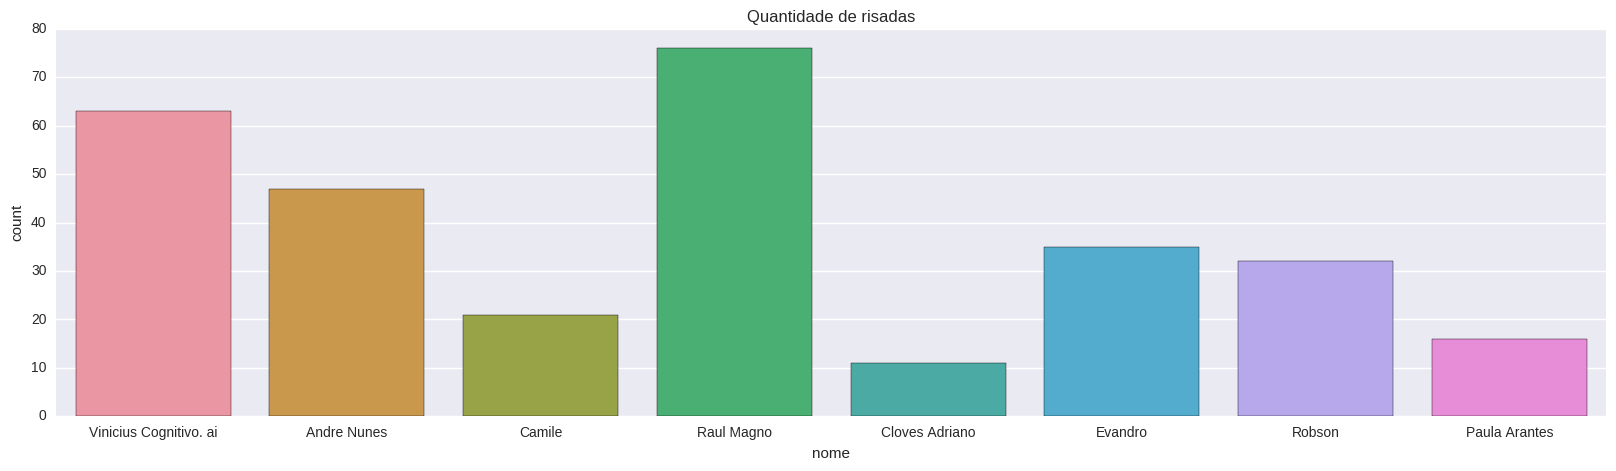

In [57]:
sns.countplot(x='nome', data=df_risadas).set_title('Quantidade de risadas');

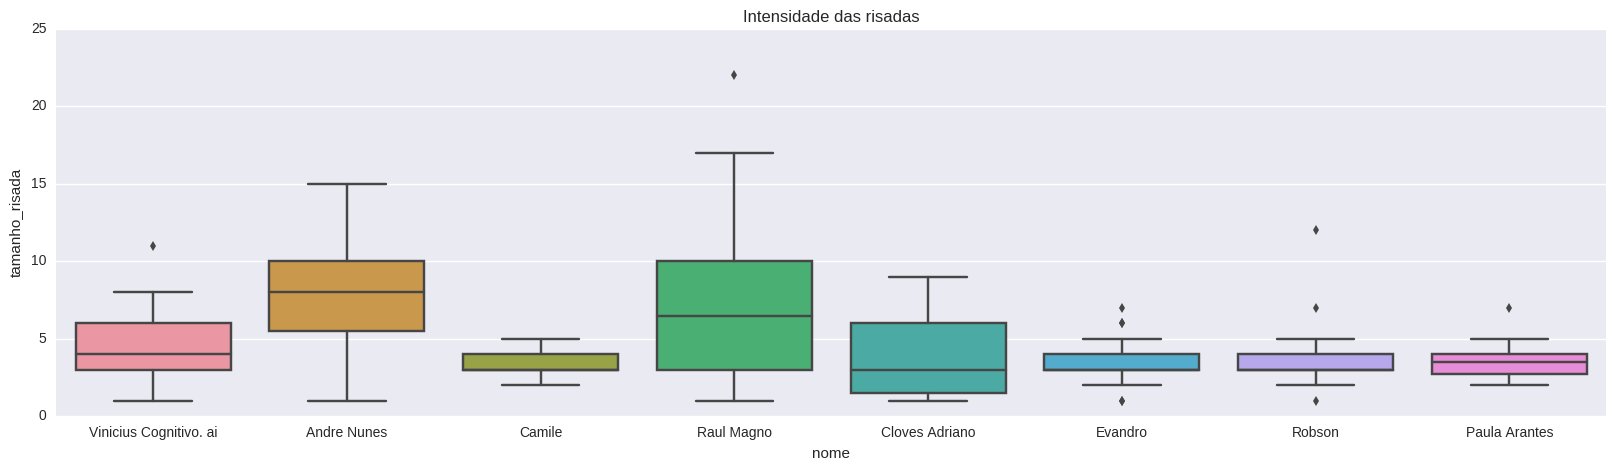

In [58]:
sns.boxplot(x='nome', y='tamanho_risada', data=df_risadas).set_title('Intensidade das risadas');

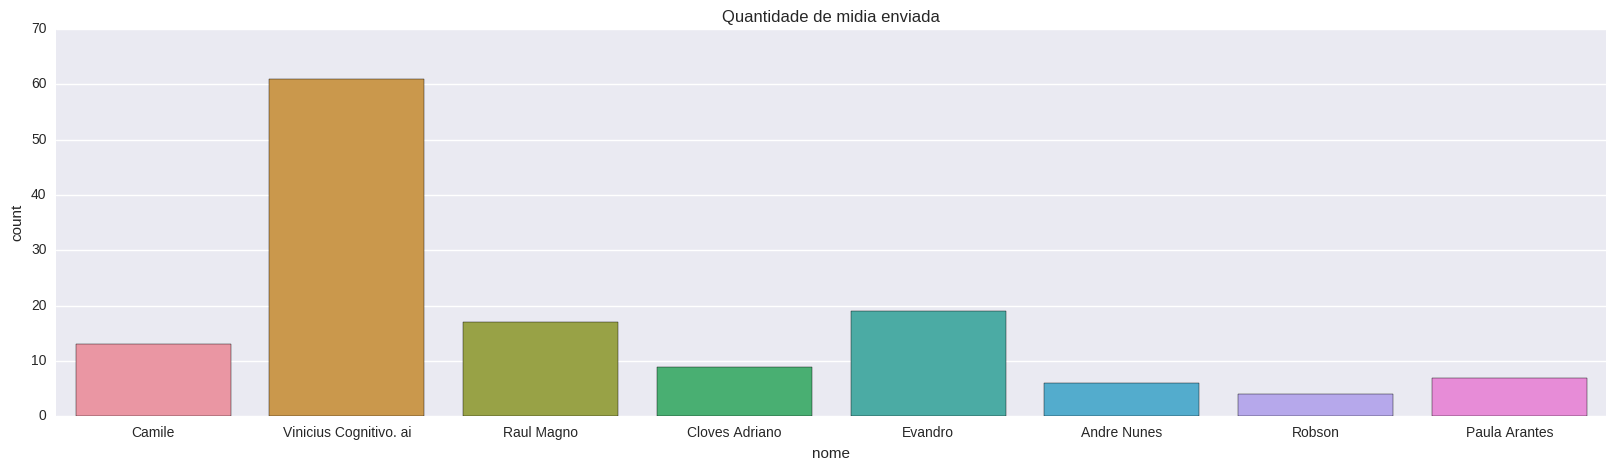

In [59]:
sns.countplot(x='nome', data=midia).set_title('Quantidade de midia enviada');

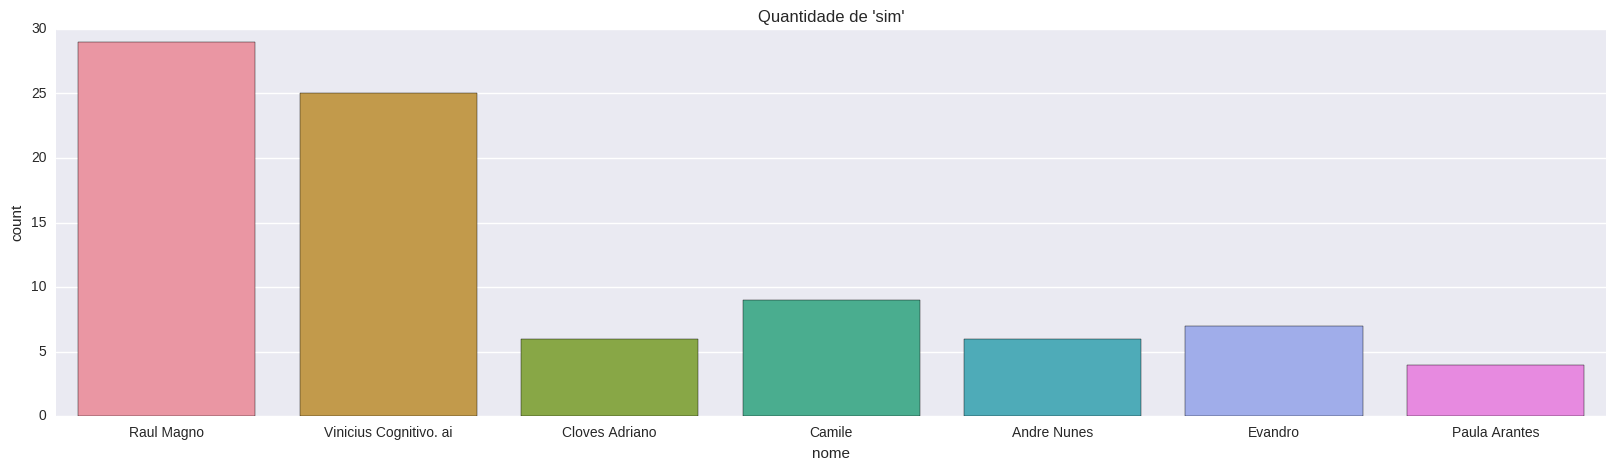

In [60]:
sns.countplot(x='nome', data=sim).set_title("Quantidade de 'sim'");

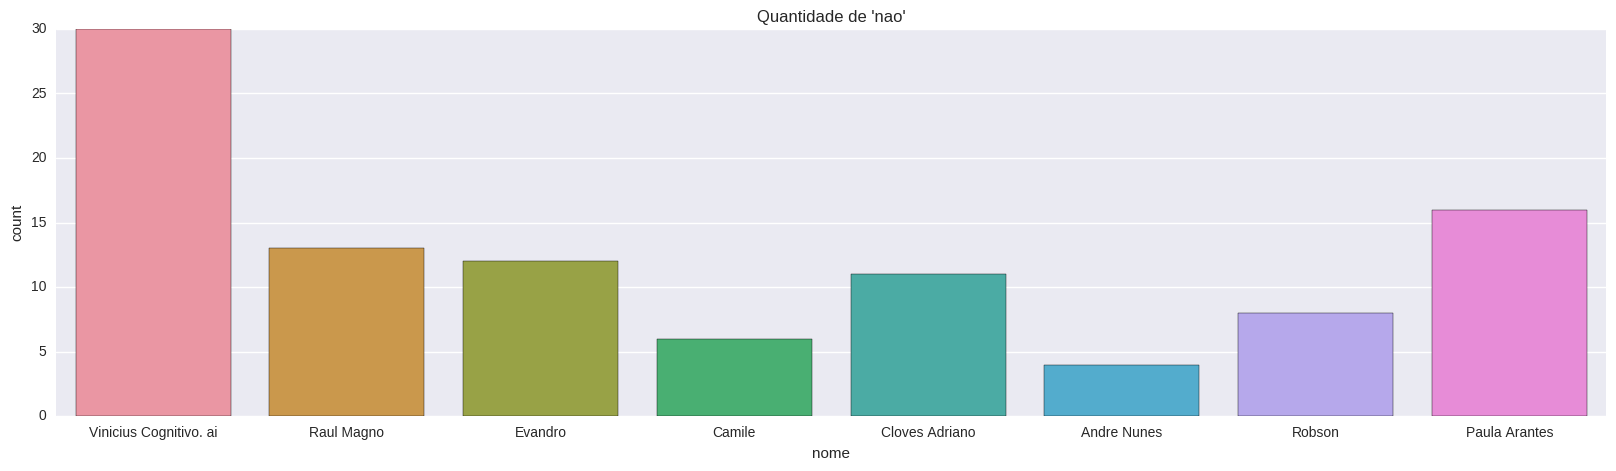

In [61]:
sns.countplot(x='nome', data=negatividade).set_title("Quantidade de 'nao'");

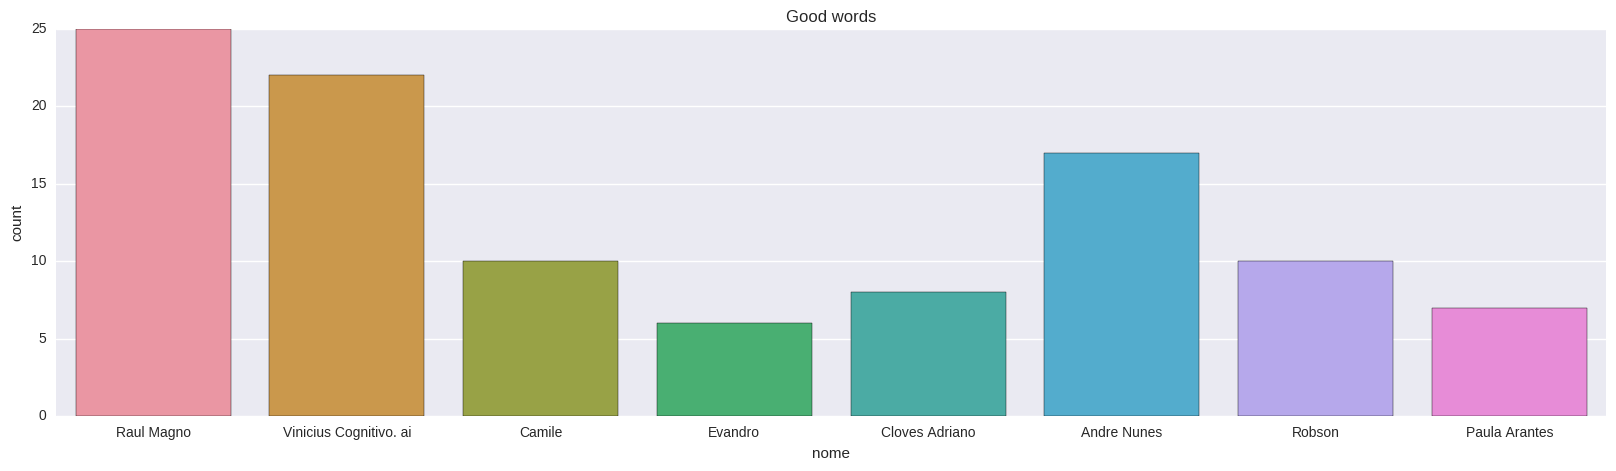

In [62]:
# boa, legal, feliz, alegre, contente, alegria, felicidade
sns.countplot(x='nome', data=positividade).set_title("Good words");

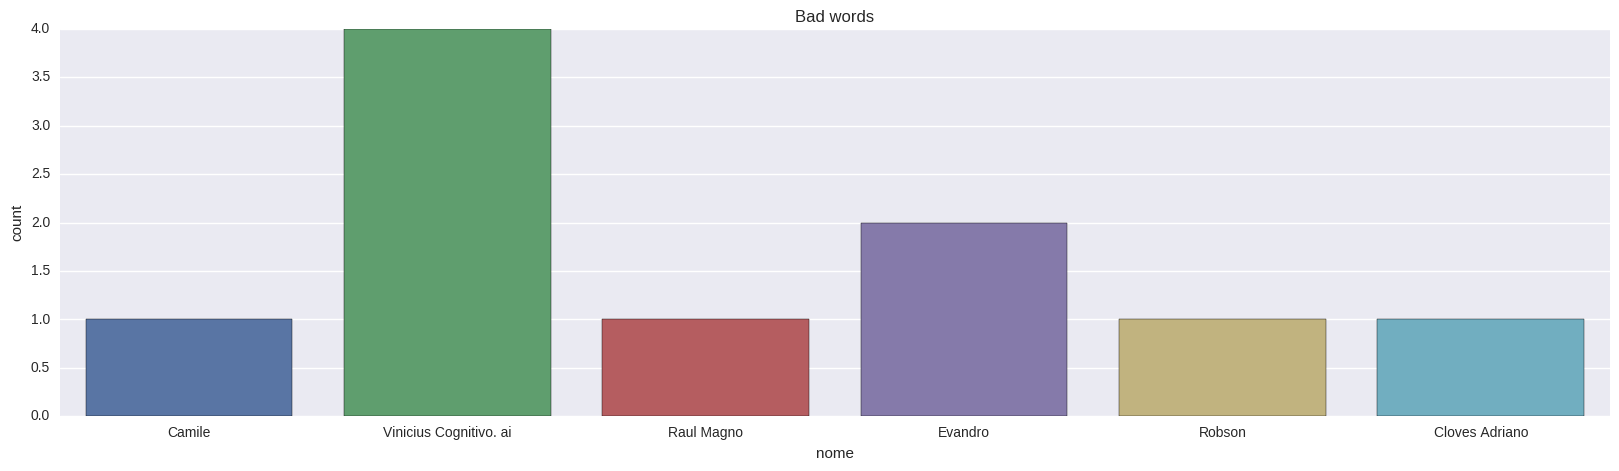

In [63]:
# ruim, mal, bad, triste, infeliz, chato, texto
sns.countplot(x='nome', data=ruim2).set_title('Bad words');

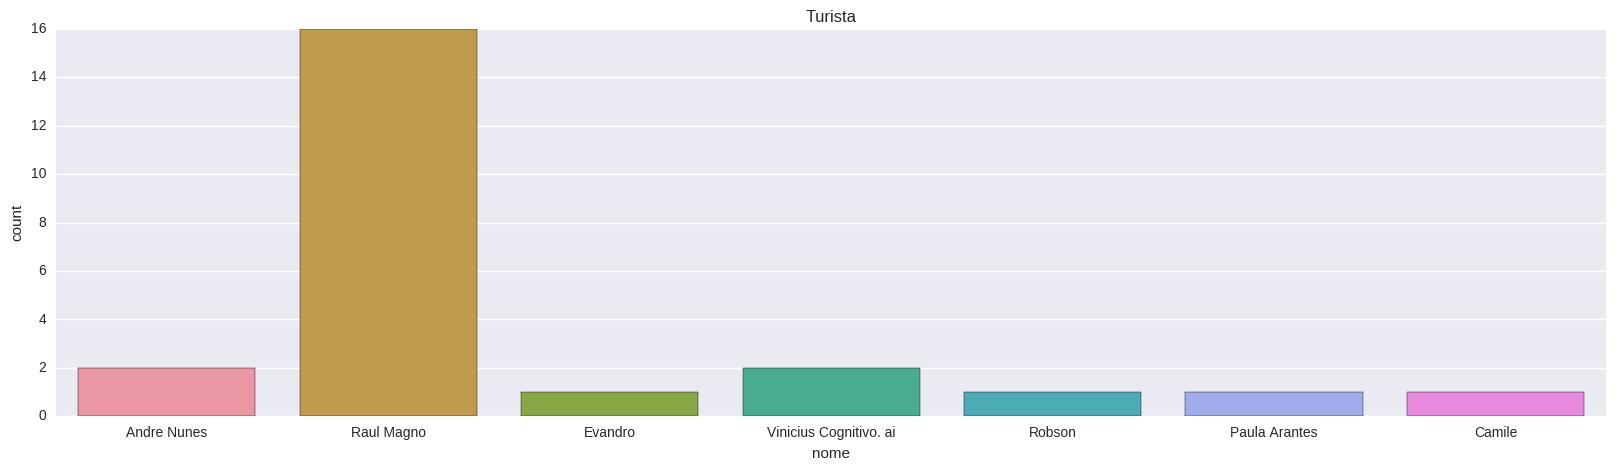

In [64]:
# viagem, viajando, viajar ,viajarei, pro rio
# para o rio, pra portugal, para portugal
# vôo, avião, aeroporto
sns.countplot(x='nome', data=viajante).set_title("Turista");

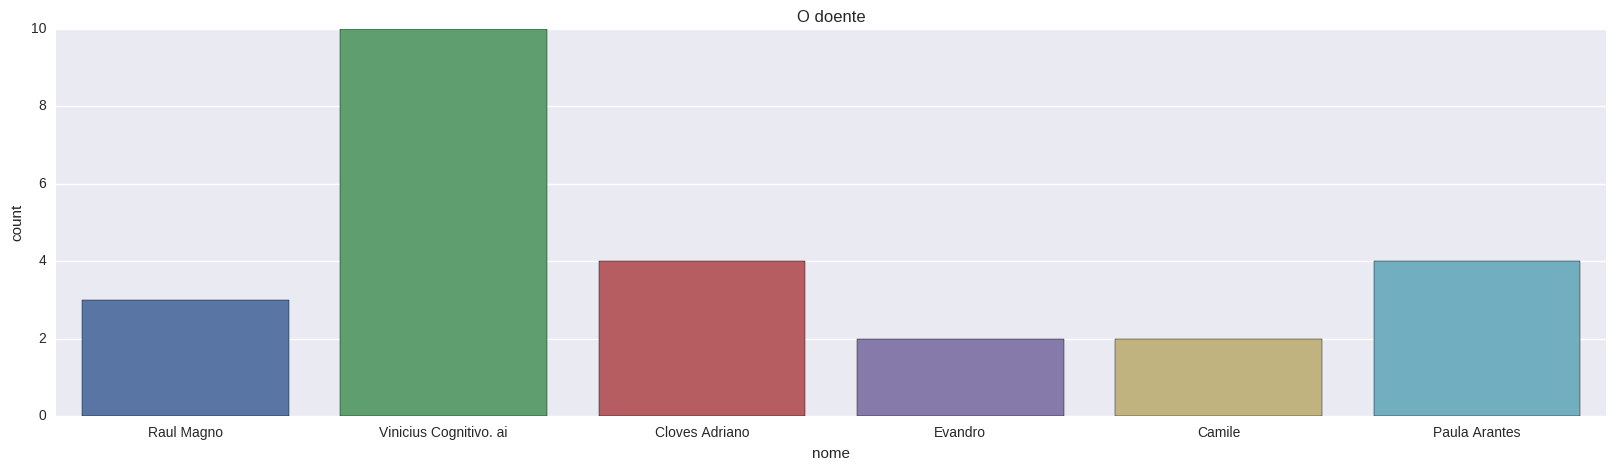

In [65]:
# doente, hospital, passei mal, passando mal, passar mal
# to mal, remédio, médico, exame, febre
# dor, vacina
sns.countplot(x='nome', data=doente).set_title("O doente");

Quem costuma mencionar mais quem

<img src='diagrama.png'>

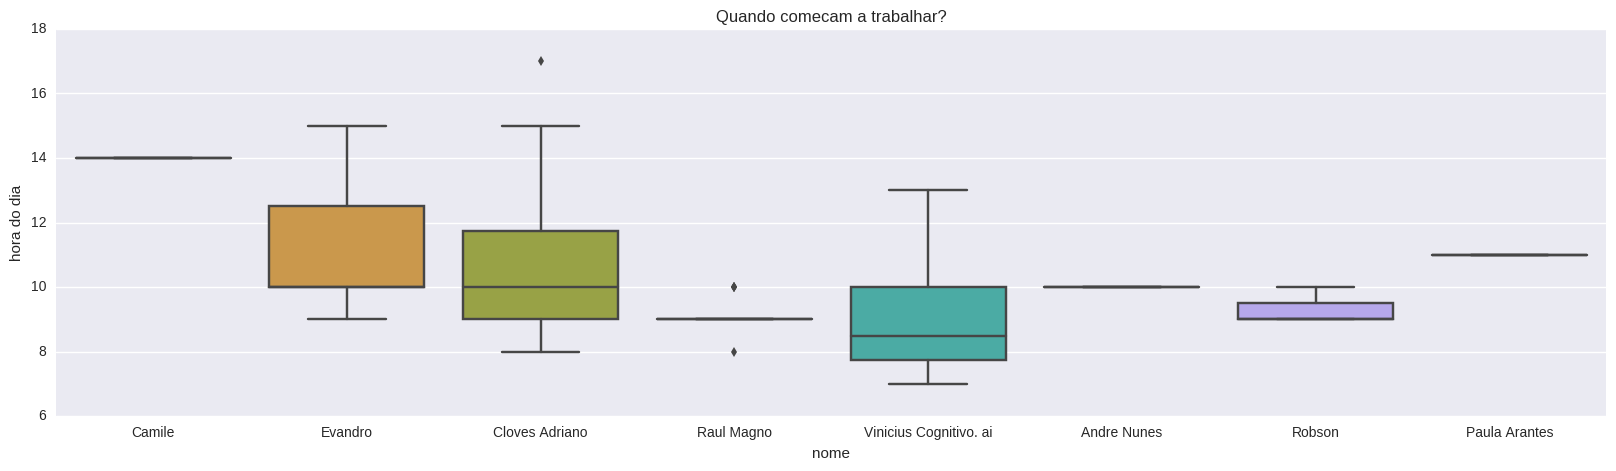

In [74]:
sns.boxplot(x='nome', y='hora do dia', data=on).set_title('Quando comecam a trabalhar?');